# Práctica 9 -  Agregaciones

## Se tiene que entregar un informe por cliente donde entregues la siguiente información:

### **1. ¿Cuál cliente realizó la compra máxima en el año 2018?**

In [1]:
USE base;

SELECT 
    ID_Cliente, 
    MAX(Venta) AS Compra_maxima
FROM 
    ventas 
WHERE 
    `Fecha venta` LIKE '%-18'
GROUP BY 
    ID_Cliente
ORDER BY 
    Compra_maxima DESC
LIMIT 1;

Commands completed successfully

(1 row(s) affected)

Total execution time: 00:00:01.022

ID_Cliente,Compra_maxima
8,2977318


### **2. ¿Cuál fue el pago menor que recibimos en el año 2018?**

In [3]:
USE base;

SELECT MIN(pago) AS Pago_menor
FROM pagos
WHERE `fecha_pago` LIKE '%2018';

Commands completed successfully

(1 row(s) affected)

Total execution time: 00:00:01.027

Pago_menor
7441


### **3. ¿Cuántas ventas se lograron en el 2do semestre del año 2018?**

In [4]:
SELECT COUNT(*) AS Ventas_Segundo_Semestre
FROM ventas
WHERE STR_TO_DATE(`Fecha venta`, '%d-%b-%y') BETWEEN '2018-07-01' AND '2018-12-31';

(1 row(s) affected)

Total execution time: 00:00:01.017

Ventas_Segundo_Semestre
468


# **Resumir on GROUP BY**

## <span style="color: var(--vscode-foreground);">Genera una vista para entregar el informe que contenga:</span>

### **4. Las ventas por vendendor**

In [4]:
CREATE VIEW VentasPorVendedor AS
SELECT 
    v.ID_Vendedor,
    CONCAT(v.Nombre, ' ', v.Apellido) AS Nombre_Vendedor,
    COUNT(ve.ID_Venta) AS Numero_Ventas
FROM 
    vendedor v
LEFT JOIN 
    ventas ve ON v.ID_Vendedor = ve.ID_Vendedor
GROUP BY 
    v.ID_Vendedor;

Total execution time: 00:00:00

VISTA VENTAS POR VENDEDOR

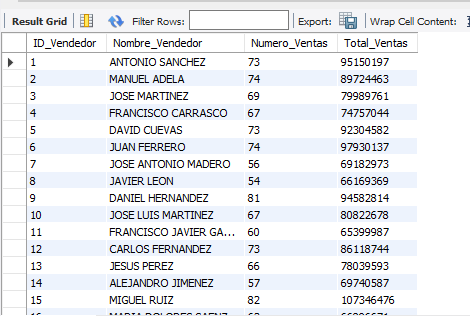

### **5. Ventas por producto**

In [5]:
CREATE VIEW VentasPorProducto AS
SELECT 
    p.ID_Producto,
    p.Producto,
    COUNT(v.ID_Venta) AS Numero_Ventas
FROM 
    producto p
LEFT JOIN 
    ventas v ON p.ID_Producto = v.ID_producto
GROUP BY 
    p.ID_Producto, p.Producto;

Total execution time: 00:00:00.003

: 1050 (42S01): Table 'VentasPorProducto' already exists

VISTA VENTAS POR PRODUCTO

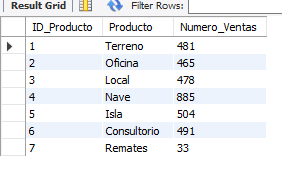

### **6. Resumen de compras por cliente en 2017**

In [6]:
CREATE VIEW ResumenComprasPorCliente2017 AS
SELECT 
    c.ID_Cliente,
    c.Nombre,
    COUNT(v.ID_Venta) AS Numero_Compras
FROM 
    clientes c
LEFT JOIN 
    ventas v ON c.ID_Cliente = v.ID_Cliente
WHERE 
    STR_TO_DATE(`v`.`Fecha venta`, '%d-%b-%y') BETWEEN '2017-01-01' AND '2017-12-31'
GROUP BY 
    c.ID_Cliente, c.Nombre;


Total execution time: 00:00:00.001

: 1050 (42S01): Table 'ResumenComprasPorCliente2017' already exists

VISTA RESUMEN DE COMPRAS POR CLIENTE EN 2017

  

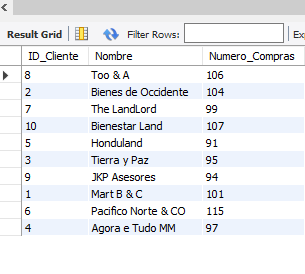

# **Having**

## **Tomando en cuenta el ejercicio anterior:**

### **7. Resumen de compras por cliente en 2017 que hayan sido mayores a 150000**

In [7]:
CREATE VIEW ResumenComprasPorCliente2017Mayores150000 AS
SELECT 
    c.ID_Cliente,
    c.Nombre, 
    COUNT(v.ID_Venta) AS Numero_Compras,
    SUM(v.Venta) AS Total_Compras
FROM 
    clientes c
LEFT JOIN 
    ventas v ON c.ID_Cliente = v.ID_Cliente
WHERE 
    STR_TO_DATE(`v`.`Fecha venta`, '%d-%b-%y') BETWEEN '2017-01-01' AND '2017-12-31'
GROUP BY 
    c.ID_Cliente, c.Nombre
HAVING 
    SUM(v.Venta) > 150000;

Total execution time: 00:00:00.001

: 1050 (42S01): Table 'ResumenComprasPorCliente2017Mayores150000' already exists

VISTA 

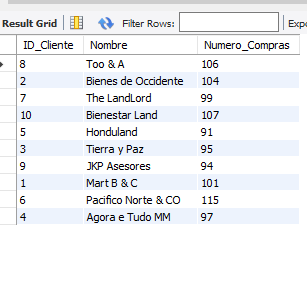

# **Extra**

### **8. Proporcione la lista de los clientes morosos**

In [8]:
SELECT 
    c.Nombre AS Nombre_Cliente,
    v.ID_Venta,
    v.`Fecha venta` AS Fecha_Venta,
    p.fecha_pago,
    DATEDIFF(STR_TO_DATE(p.fecha_pago, '%d/%m/%Y'), STR_TO_DATE(v.`Fecha venta`, '%d-%b-%y')) AS Dias_Retraso
FROM 
    clientes c
JOIN 
    ventas v ON c.ID_Cliente = v.ID_Cliente
JOIN 
    pagos p ON v.ID_Venta = p.id_venta
WHERE 
    DATEDIFF(STR_TO_DATE(p.fecha_pago, '%d/%m/%Y'), STR_TO_DATE(v.`Fecha venta`, '%d-%b-%y')) > 180
ORDER BY 
    c.Nombre, v.`Fecha venta`;

(169 row(s) affected)

Total execution time: 00:00:01.042

Nombre_Cliente,ID_Venta,Fecha_Venta,fecha_pago,Dias_Retraso
Agora e Tudo MM,1794,10-Feb-17,28/10/2017,260
Agora e Tudo MM,1795,10-Feb-17,15/10/2017,247
Agora e Tudo MM,2782,10-Feb-18,08/10/2018,240
Agora e Tudo MM,770,10-Jan-16,31/10/2016,295
Agora e Tudo MM,1789,10-Jan-17,27/10/2017,290
Agora e Tudo MM,786,10-Mar-16,24/10/2016,228
Agora e Tudo MM,1797,10-Mar-17,29/10/2017,233
Agora e Tudo MM,2869,11-Feb-18,28/11/2018,290
Agora e Tudo MM,862,11-Jan-16,02/11/2016,296
Agora e Tudo MM,949,12-Feb-16,13/12/2016,305


TODOS CLIENTES SON MOROSOS,  

<span style="color: rgb(13, 13, 13); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space-collapse: preserve; background-color: rgb(255, 255, 255);">Para determinar y listar los clientes morosos basándose en la información proporcionada, necesitao definir qué se considera un "cliente moroso". Supongamos que un cliente es considerado moroso si su pago fue realizado más de <b>180 !!!</b> días después de la fecha de la venta.</span>